<a href="https://colab.research.google.com/github/tamara-kostova/IIS/blob/master/lastfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00


In [1]:
import pandas as pd

# Load the interaction data
interaction_data = pd.read_csv('/content/drive/MyDrive/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', header=None,
                               names=['userid', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name'], on_bad_lines='skip')

# Load the user profile data
user_profile = pd.read_csv('/content/drive/MyDrive/userid-profile.tsv', sep='\t', header=None,
                           names=['userid', 'gender', 'age', 'country', 'signup'])

In [ ]:
interaction_data.head()

,userid,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [ ]:
interaction_data.describe()

,userid,timestamp,artist_id,artist_name,track_id,track_name
count,19098853,19098853,18498005,19098853,16936134,19098643
unique,992,17454730,107295,173921,960402,1083470
top,user_000949,2009-02-26T21:29:15Z,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,183103,248,115099,115099,3991,17561


In [ ]:
user_profile.head()

,userid,gender,age,country,signup
0,#id,gender,age,country,registered
1,user_000001,m,NaN,Japan,"Aug 13, 2006"
2,user_000002,f,NaN,Peru,"Feb 24, 2006"
3,user_000003,m,22,United States,"Oct 30, 2005"
4,user_000004,f,NaN,NaN,"Apr 26, 2006"


In [ ]:
user_profile.describe()

,userid,gender,age,country,signup
count,993,885,287,908,985
unique,993,3,35,67,626
top,#id,m,21,United States,"Dec 6, 2005"
freq,1,502,36,228,6


In [ ]:
# Check for missing values
print("Interaction Data Missing Values:")
print(interaction_data.isnull().sum())
print("\nUser Profile Data Missing Values:")
print(user_profile.isnull().sum())

Interaction Data Missing Values:
userid               0
timestamp            0
artist_id       600848
artist_name          0
track_id       2162719
track_name         210
dtype: int64

User Profile Data Missing Values:
userid       0
gender     108
age        706
country     85
signup       8
dtype: int64


In [11]:
interaction_data.dropna(subset=['track_id'], inplace=True)
user_profile['gender'].fillna('unknown', inplace=True)
# user_profile['age'].fillna(user_profile['age'].mean(), inplace=True)
user_profile['country'].fillna('unknown', inplace=True)

In [ ]:
# Summarize the data
print(f"Total interactions: {len(interaction_data)}")
print(f"Unique users: {interaction_data['userid'].nunique()}")
print(f"Unique artists: {interaction_data['artist_id'].nunique()}")
print(f"Unique tracks: {interaction_data['track_id'].nunique()}")

Total interactions: 16936134
Unique users: 992
Unique artists: 83905
Unique tracks: 960402


In [14]:
import matplotlib.pyplot as plt

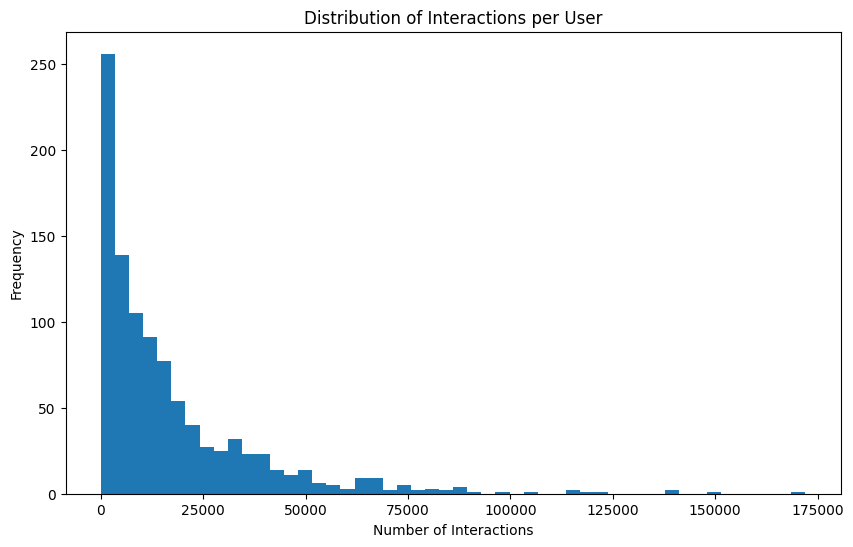

In [ ]:
# Distribution of interactions per user
plt.figure(figsize=(10, 6))
interaction_data['userid'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

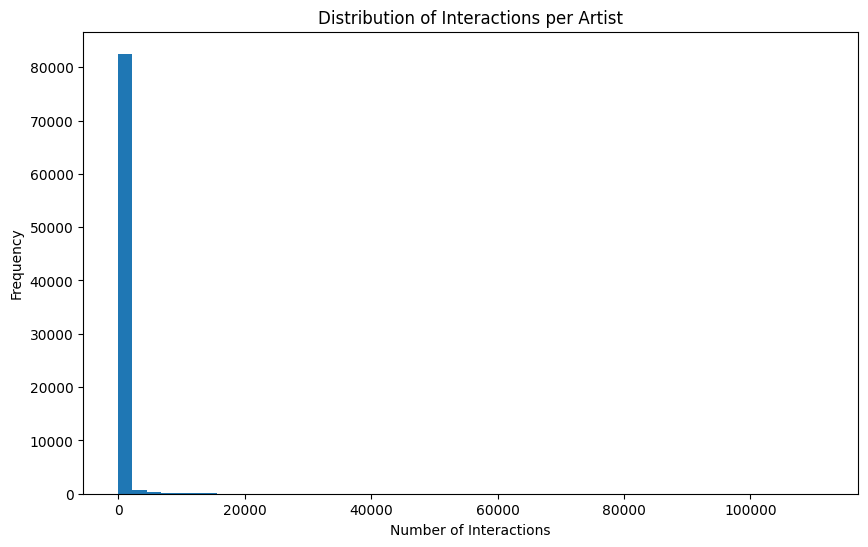

In [ ]:
# Distribution of interactions per artist
plt.figure(figsize=(10, 6))
interaction_data['artist_id'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribution of Interactions per Artist')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

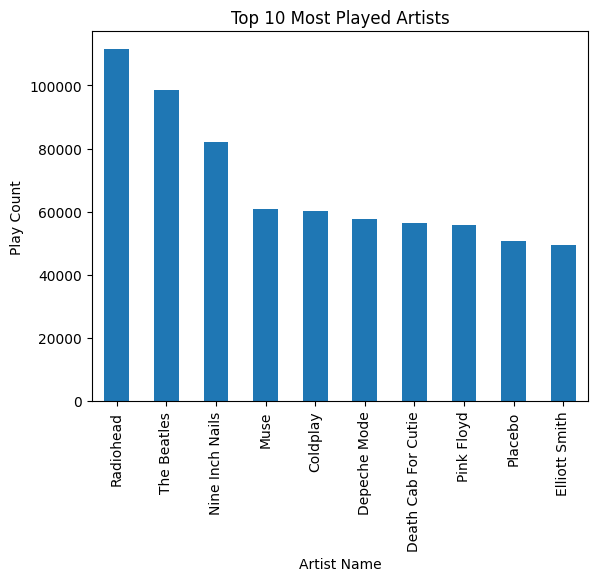

In [ ]:
top_artists = interaction_data['artist_name'].value_counts().head(10)
top_artists.plot(kind='bar')
plt.xlabel('Artist Name')
plt.ylabel('Play Count')
plt.title('Top 10 Most Played Artists')
plt.show()

In [12]:
user_mapping = {id: idx for idx, id in enumerate(interaction_data['userid'].unique())}
artist_mapping = {id: idx for idx, id in enumerate(interaction_data['artist_id'].unique())}

# Apply the mappings
interaction_data['user_id'] = interaction_data['userid'].map(user_mapping)
interaction_data['artist_id'] = interaction_data['artist_id'].map(artist_mapping)

In [ ]:
# Verify the mapping
print(interaction_data[['userid', 'user_id']].drop_duplicates().head(10))
print(interaction_data[['artist_id', 'artist_name']].drop_duplicates().head(10))

             userid  user_id
10      user_000001        0
16685   user_000002        1
74124   user_000003        2
93617   user_000004        3
112029  user_000005        4
132373  user_000006        5
161390  user_000007        6
163853  user_000008        7
201080  user_000009        8
206312  user_000010        9
    artist_id      artist_name
10          0             坂本龍一
14          1       Underworld
16          2  Ennio Morricone
17          3          Minus 8
18          4        Beanfield
19          5         Dj Linus
20          6        Alif Tree
22          7          Wei-Chi
23          8        Marsmobil
24          9            Karma


In [ ]:
# Sample data to ensure correct mappings
sample_data = interaction_data.sample(10)
print(sample_data[['userid', 'user_id', 'artist_id', 'artist_name']])

               userid  user_id  artist_id         artist_name
17510729  user_000909      901       6245         Bruce Haack
13901367  user_000732      724       6893            Soilwork
5756758   user_000296      293       1639    Armin Van Buuren
15903930  user_000824      816        835       José González
4138899   user_000210      209       9551         Buju Banton
17523416  user_000909      901       1858    Butthole Surfers
15530388  user_000802      794       1628            The Used
537873    user_000023       22       1303  The Rolling Stones
7143107   user_000366      362       6829           Meshuggah
14956043  user_000790      782        712                 Air


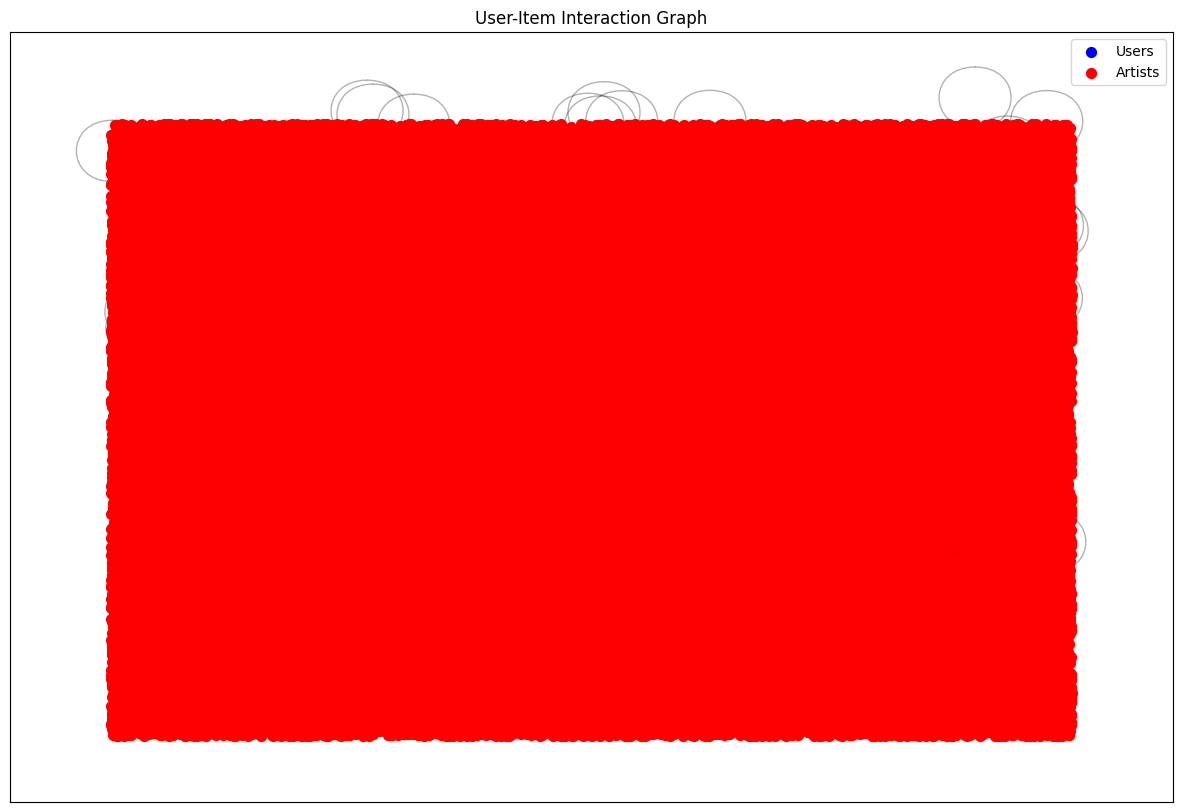

In [15]:
import networkx as nx

G = nx.Graph()

for _, row in interaction_data.iterrows():
    G.add_node(row['user_id'], label='user')
    G.add_node(row['artist_id'], label='artist')
    G.add_edge(row['user_id'], row['artist_id'])

pos = nx.random_layout(G)
plt.figure(figsize=(15, 10))

user_nodes = [node for node, data in G.nodes(data=True) if data['label'] == 'user']
artist_nodes = [node for node, data in G.nodes(data=True) if data['label'] == 'artist']

nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='blue', node_size=50, label='Users')
nx.draw_networkx_nodes(G, pos, nodelist=artist_nodes, node_color='red', node_size=50, label='Artists')
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.legend(['Users', 'Artists'], loc='upper right')
plt.title('User-Item Interaction Graph')
plt.show()

In [ ]:
import networkx as nx

G = nx.Graph()

# Add user and artist nodes
G.add_nodes_from(interaction_data['user_id'].unique(), bipartite=0)  # User nodes
G.add_nodes_from(interaction_data['artist_id'].unique(), bipartite=1)  # Artist nodes

# Add edges (interactions)
edges = list(zip(interaction_data['user_id'], interaction_data['artist_id']))
G.add_edges_from(edges)


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define the GCN model
class GCNRecommender(torch.nn.Module):
    def __init__(self, num_users, num_artists, hidden_channels):
        super(GCNRecommender, self).__init__()
        self.user_embedding = torch.nn.Embedding(num_users, hidden_channels)
        self.artist_embedding = torch.nn.Embedding(num_artists, hidden_channels)
        self.conv1 = GCNConv(hidden_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, edge_index):
        x = torch.cat([self.user_embedding.weight, self.artist_embedding.weight])
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Prepare data for PyTorch Geometric
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data = Data(edge_index=edge_index)


In [ ]:
from sklearn.model_selection import train_test_split

# Split edges into training and validation sets
train_edges, val_edges = train_test_split(edges, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_edge_index = torch.tensor(train_edges, dtype=torch.long).t().contiguous()
val_edge_index = torch.tensor(val_edges, dtype=torch.long).t().contiguous()


In [ ]:
num_users = len(user_mapping)
num_artists = len(artist_mapping)
hidden_channels = 64

model = GCNRecommender(num_users, num_artists, hidden_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(train_edge_index)
    loss = F.mse_loss(out, train_edge_index)
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(100):
    loss = train()
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}')


In [ ]:
def recommend(user_id, top_k=10):
    model.eval()
    with torch.no_grad():
        out = model(data.edge_index)
        user_embedding = out[user_id]
        scores = torch.matmul(user_embedding, out.T)
        _, recommended_artists = torch.topk(scores, top_k)
    return recommended_artists

user_id = 0  # Example user ID
recommendations = recommend(user_id)
print(f'Recommended artists for user {user_id}: {recommendations}')
